In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21.0
4,0.0,NaN,40.0,35,NaN,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	19
float64		column 3	19
int64		column 4	0
float64		column 5	57
float64		column 6	57
float64		column 7	57
float64		column 8	57


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,749.000000,749.000000,768.000000,711.000000,711.000000,711.000000,711.000000
mean,3.834247,120.627503,68.922563,20.536458,79.012658,32.008017,0.468435,33.127989
std,3.329410,31.795492,19.407380,15.952218,114.968844,7.600955,0.325535,11.706225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.350000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,125.000000,36.350000,0.606000,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000


<AxesSubplot:>

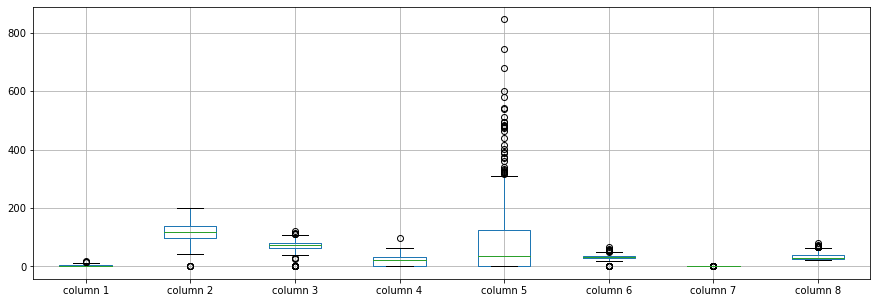

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.834247
column 2    120.627503
column 3     68.922563
column 4     20.536458
column 5     79.012658
column 6     32.008017
column 7      0.468435
column 8     33.127989
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.116783,0.138924,-0.083111,-0.101651,-0.012262,-0.037537,0.524076
column 2,0.116783,1.000000,0.147555,0.063223,0.351052,0.201693,0.116363,0.263003
column 3,0.138924,0.147555,1.000000,0.215718,0.103414,0.259020,0.027141,0.231245
column 4,-0.083111,0.063223,0.215718,1.000000,0.429694,0.397616,0.185361,-0.114689
column 5,-0.101651,0.351052,0.103414,0.429694,1.000000,0.199897,0.216152,-0.027667
column 6,-0.012262,0.201693,0.259020,0.397616,0.199897,1.000000,0.083236,0.045685
column 7,-0.037537,0.116363,0.027141,0.185361,0.216152,0.083236,1.000000,0.051137
column 8,0.524076,0.263003,0.231245,-0.114689,-0.027667,0.045685,0.051137,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+43,8+43+43,8+43+43+43,8+43+43+43+43,8+43+43+43+43+43,8+43+43+43+43+43+43,8+43+43+43+43+43,8+43+43+43+43,8+43+43+43,8+43+43,8+43,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 407.99878311157227
Epoch: 1 , loss: 406.4684804280599
Epoch: 2 , loss: 404.5529276529948
Epoch: 3 , loss: 403.7714328765869
Epoch: 4 , loss: 401.8658968607585
Epoch: 5 , loss: 398.8065191904704
Epoch: 6 , loss: 397.26776059468585
Epoch: 7 , loss: 391.9278971354167
Epoch: 8 , loss: 387.9576295216878
Epoch: 9 , loss: 380.5911051432292
Epoch: 10 , loss: 380.25180371602374
Epoch: 11 , loss: 371.4322261810303
Epoch: 12 , loss: 371.10897509257
Epoch: 13 , loss: 365.4889901479085
Epoch: 14 , loss: 354.94004885355633
Epoch: 15 , loss: 350.4682159423828
Epoch: 16 , loss: 339.7820930480957
Epoch: 17 , loss: 342.74359099070233
Epoch: 18 , loss: 336.80646737416583
Epoch: 19 , loss: 330.1127446492513
Epoch: 20 , loss: 323.0132776896159
Epoch: 21 , loss: 324.362117767334
Epoch: 22 , loss: 320.4653956095378
Epoch: 23 , loss: 317.54899915059406
Epoch: 24 , loss: 312.0931479136149
Epoch: 25 , loss: 316.46280733744305
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
1,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
2,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
3,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
4,0.00000,-58.242874,0.0,0,-120.69405,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,-9.59450,0.000000,0.0,0,0.00000,0.0,0.0,0.0
764,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
765,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0
766,0.00000,0.000000,0.0,0,0.00000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1107.833168085027, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.19178023804455946

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5      0.000000
column 6     32.500000
column 7      0.425856
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.00000,148.000000,72.0,35,0.00000,33.6,0.627,50.0
1,1.00000,85.000000,66.0,29,0.00000,26.6,0.351,31.0
2,8.00000,183.000000,64.0,0,0.00000,23.3,0.672,32.0
3,1.00000,89.000000,66.0,23,94.00000,28.1,0.167,21.0
4,0.00000,78.757126,40.0,35,47.30595,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,0.40550,101.000000,76.0,48,180.00000,32.9,0.171,63.0
764,2.00000,122.000000,70.0,27,0.00000,36.8,0.340,27.0
765,5.00000,121.000000,72.0,23,112.00000,26.2,0.245,30.0
766,1.00000,126.000000,60.0,0,0.00000,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_NG_5.xlsx", index=False, header=False)